# Sample usage

This notebook gives you introduction to use the package.

In [1]:
import sys
sys.path.append("../")
sys.path.append(".")
from model_criticism_mmd import ModelTrainerTorchBackend, MMD, TwoSampleDataSet, split_data
from model_criticism_mmd.backends import kernels_torch

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch

# Device choice

If you are able to use CUDA, you can give `device_obj` to objects. The default value is CPU.

In [3]:
device_obj = torch.device('cpu')

# Scenario-1: 2 distributions are similar

In [4]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [5]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

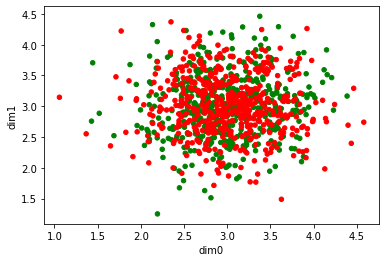

In [6]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [7]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [8]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)
# you can use split_data function also.
# dataset_train, dataset_val, = split_data(x_train, y_train)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator=mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=1000, batchsize=200)

2021-07-12 09:42:36,063 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 8.62147301365912e-05, ratio = [0.8621473] obj = [0.14832914]
2021-07-12 09:42:36,628 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.004503515902727739 obj [-2.22239471] val-MMD^2 0.011289787003512464 val-ratio [4.83540524] val-obj [-1.57596494]  elapsed: 0.0
2021-07-12 09:42:37,632 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.009942401108849967 obj [-4.16505216] val-MMD^2 0.01991424289328504 val-ratio [74.11302791] val-obj [-4.30559133]  elapsed: 0.0
2021-07-12 09:42:38,899 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.009965769027024556 obj [-4.60173826] val-MMD^2 0.01984261987165872 val-ratio [126.27835138] val-obj [-4.83848861]  elapsed: 0.0
2021-07-12 09:42:41,353 - model_criticism_mmd.logger_unit - INFO -    100: [avg train] MMD^2 0.00996778118928851 obj [-4.60194053] val-MMD^2 0.019846167895262674 val-ratio [129.412

In [9]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales}, {trained_params}')

Preffered parameters scales = [2.9883726 2.3765037], {'log_sigma': tensor([-5.4967], requires_grad=True)}


In [10]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.01991824900889278


# Scenario-2: 2 distributions are not similar

In [11]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [12]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

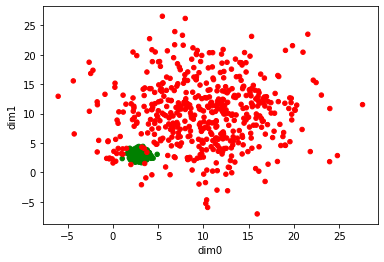

In [13]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [14]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [15]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=1000, batchsize=200)

2021-07-12 09:43:34,417 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.7602174810925406, ratio = [11.62812086] obj = [-2.45342638]
2021-07-12 09:43:34,725 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.7684620238901052 obj [-3.89562674] val-MMD^2 0.7680837884085877 val-ratio [34.08773343] val-obj [-3.5289376]  elapsed: 0.0
2021-07-12 09:43:36,100 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.8595006014987138 obj [-4.03138707] val-MMD^2 0.8594732779726545 val-ratio [33.29279906] val-obj [-3.50534113]  elapsed: 0.0
2021-07-12 09:43:37,505 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.8587938489042674 obj [-4.03172276] val-MMD^2 0.8595688121685249 val-ratio [33.23868557] val-obj [-3.50371443]  elapsed: 0.0
2021-07-12 09:43:40,297 - model_criticism_mmd.logger_unit - INFO -    100: [avg train] MMD^2 0.8588540279637491 obj [-4.03172346] val-MMD^2 0.8596130153911438 val-ratio [33.23325658] val-obj

In [16]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales} / {trained_params}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters scales = [0.7637163  0.66495126] / {'log_sigma': tensor([0.1653], requires_grad=True)}
MMD^2 distance = 0.85959691953049


# Kernel functions

You can set kernel functions as you like. The Kernel functions are in `model_criticism_mmd.backends.kernels_torch`

In [17]:
# example with Matern Kernel
from model_criticism_mmd.backends import kernels_torch
kernel_matern = kernels_torch.MaternKernelFunction(device_obj=device_obj, nu=0.5)
mmd_estimator_matern = MMD(kernel_matern, device_obj=device_obj)
trainer_matern = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj)
trained_obj_matern = trainer_matern.train(dataset_training=dataset_train, dataset_validation=dataset_val, 
                                          num_epochs=1000, batchsize=200)

     5: [avg train] MMD^2 0.8249662608123473 obj [-4.13321397] val-MMD^2 0.7839525102190884 val-ratio [31.67448144] val-obj [-3.45551135]  elapsed: 0.0
    25: [avg train] MMD^2 0.8815834884803546 obj [-4.2155917] val-MMD^2 0.8590686730412929 val-ratio [32.05543593] val-obj [-3.46746678]  elapsed: 0.0
    50: [avg train] MMD^2 0.8799797034640525 obj [-4.21568004] val-MMD^2 0.8579573221876715 val-ratio [32.0699843] val-obj [-3.46792052]  elapsed: 0.0
   100: [avg train] MMD^2 0.8799711000289392 obj [-4.21568241] val-MMD^2 0.8579471817421105 val-ratio [32.07315221] val-obj [-3.4680193]  elapsed: 0.0
   200: [avg train] MMD^2 0.8799705827867044 obj [-4.21568445] val-MMD^2 0.8579442327969535 val-ratio [32.07321626] val-obj [-3.4680213]  elapsed: 0.0
   300: [avg train] MMD^2 0.8799700502895624 obj [-4.21568647] val-MMD^2 0.8579412886554939 val-ratio [32.07328106] val-obj [-3.46802332]  elapsed: 0.0
   400: [avg train] MMD^2 0.8799695292423353 obj [-4.21568845] val-MMD^2 0.8579383615912117 

In [18]:
trained_obj_matern.scales

array([0.6859423 , 0.98347324], dtype=float32)

As you see, the scales are totally different from the one with RBFKernel

# ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

Remebmer that you set __opt_sigma = False__ when you need ARD weights.

In [19]:
import numpy
size = 100
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [20]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for
dim_most_diff_varianace: int = sorted([(n_dim, abs(x[:,n_dim].var() - y[:,n_dim].var())) for n_dim in [0, 1, 2]],
                                      key=lambda t: t[1], reverse=True)[0][0]

1 dim. mean(x)=1.0 mean(y)=-2.112694269125093 var(x)=0.0 var(y)=2219.3064840280827
2 dim. mean(x)=10.01059608343735 mean(y)=9.943721169939076 var(x)=0.04681651445639279 var(y)=0.04604885429236361
3 dim. mean(x)=9.970284147178573 mean(y)=10.001786152809244 var(x)=0.03774612415116248 var(y)=0.03839229425356566


In [21]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_val, y_val, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=500, batchsize=200)

     5: [avg train] MMD^2 0.999365219649539 obj [-4.28718106] val-MMD^2 0.8562878734457575 val-ratio [7.06166066] val-obj [-1.95468024]  elapsed: 0.0
    25: [avg train] MMD^2 1.0162794543981337 obj [-6.90568086] val-MMD^2 0.898578898574671 val-ratio [8.63827975] val-obj [-2.15620346]  elapsed: 0.0
    50: [avg train] MMD^2 1.015660077674962 obj [-6.96592044] val-MMD^2 0.9086408816180672 val-ratio [9.19234702] val-obj [-2.21837129]  elapsed: 0.0
   100: [avg train] MMD^2 1.0153101249694727 obj [-7.02124052] val-MMD^2 0.9187878263373273 val-ratio [9.73793627] val-obj [-2.27602921]  elapsed: 0.0
   200: [avg train] MMD^2 1.014629341022547 obj [-7.13199559] val-MMD^2 0.9369902154063121 val-ratio [10.73035463] val-obj [-2.37307661]  elapsed: 0.0
   300: [avg train] MMD^2 1.0141384676668697 obj [-7.25648246] val-MMD^2 0.9524096224903491 val-ratio [11.65108105] val-obj [-2.45539897]  elapsed: 0.0
   400: [avg train] MMD^2 1.0137833350357084 obj [-7.39345744] val-MMD^2 0.9643183017341981 val-

In [22]:
assert np.argmax(trained_obj.scales) == dim_most_diff_varianace
trained_obj.scales

array([ 8.5808306e+00, -2.0205018e-03,  5.0849863e-03], dtype=float32)

As you see, the TwoSampleDataSetex of max(scales) is same as the index that data has the highest variance.